<a href="https://colab.research.google.com/github/vickyrana123/K-Means/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K-Means**

**Import all required libraries**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

**Load iris dataset and convert it into dataframe to perform task**

In [8]:
iris=load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Perform data preprocessing using standardscaler**

In [9]:
scaler=StandardScaler()
norm=scaler.fit_transform(data)

**Plot line plot to find out threshold k value**

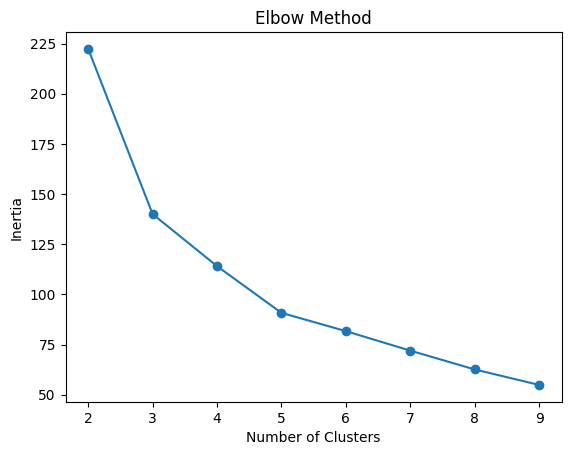

In [10]:
inertia=[]
for k in range(2,10):
  kmeans=KMeans(n_clusters=k)
  kmeans.fit(norm)
  inertia.append(kmeans.inertia_)

plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

**From the line plot optimal k value is 5 hence next we perform k means algorithm.**

In [11]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k)
cluster_assignments = kmeans.fit_predict(norm)
data['Cluster'] = cluster_assignments

**Finally plot scatter plot to display 5 distinct clusters.**

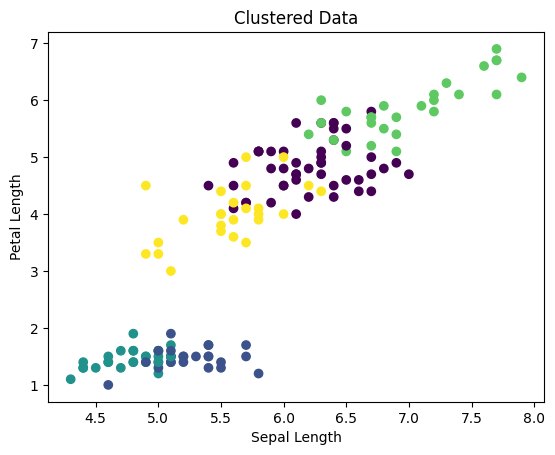

In [12]:
plt.scatter(data['sepal length (cm)'], data['petal length (cm)'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Clustered Data')
plt.show()